In [144]:
import pandas as pd
bitcoin = pd.read_excel('GDAX.BTC-USD_790301_230316.xlsx')
bitcoin.drop(range(362),inplace=True)
bitcoin.drop(range(2915, 2990),inplace=True)
bitcoin.head(10)
# bitcoin.tail(10)

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
362,GDAX.BTC-USD,D,20160101,0,430.35,437.15,427.92,435.66,3788
363,GDAX.BTC-USD,D,20160102,0,435.67,437.56,432.41,435.40,3195
364,GDAX.BTC-USD,D,20160103,0,435.40,435.75,425.02,431.91,3840
365,GDAX.BTC-USD,D,20160104,0,431.90,435.79,431.37,433.85,5848
366,GDAX.BTC-USD,D,20160105,0,433.84,435.64,430.00,433.34,5111
367,GDAX.BTC-USD,D,20160106,0,433.32,433.46,428.15,430.87,5441
368,GDAX.BTC-USD,D,20160107,0,430.66,460.15,430.64,459.07,13878
369,GDAX.BTC-USD,D,20160108,0,459.07,464.40,447.53,454.44,8317
370,GDAX.BTC-USD,D,20160109,0,454.41,456.00,447.66,450.38,4192
371,GDAX.BTC-USD,D,20160110,0,450.39,451.39,442.96,449.99,3898


In [145]:
bitcoin = bitcoin.iloc[:,[2,5,7]]
bitcoin.columns = ['Date','Open', 'Close']
bitcoin['Date'] = bitcoin['Date'].map(lambda x:str(x)[0:4]+'-'+str(x)[4:6]+'-'+str(x)[6:8]) 
bitcoin = bitcoin.set_index('Date')
bitcoin

,Open,Close
Date,,
2016-01-01,437.15,435.66
2016-01-02,437.56,435.40
2016-01-03,435.75,431.91
2016-01-04,435.79,433.85
2016-01-05,435.64,433.34
...,...,...
2022-12-27,16967.00,16698.73
2022-12-28,16777.35,16539.66
2022-12-29,16654.81,16627.54


<AxesSubplot: xlabel='Date'>

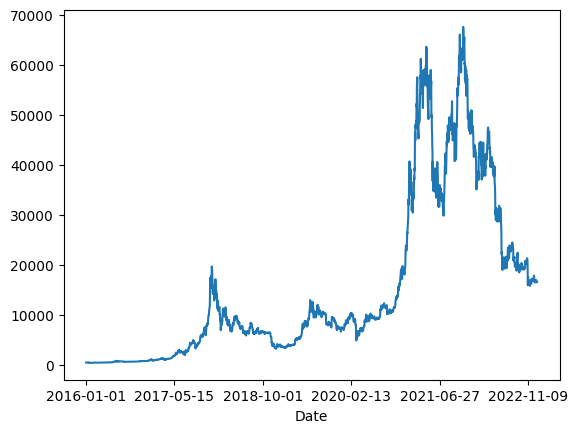

In [146]:
bitcoin['Close'].plot()

In [147]:
bitcoin.index =pd.to_datetime(bitcoin.index)
bitcoin['Year']=bitcoin.index.year
bitcoin['Mon']=bitcoin.index.month
bitcoin['Day']=bitcoin.index.day
dates=bitcoin[['Year','Mon','Day']]

bitcoin.index=pd.MultiIndex.from_tuples(dates.values.tolist(), names=dates.columns)
bitcoin

Open     Close  Year  Mon  Day
Year Mon Day                                    
2016 1   1      437.15    435.66  2016    1    1
         2      437.56    435.40  2016    1    2
         3      435.75    431.91  2016    1    3
         4      435.79    433.85  2016    1    4
         5      435.64    433.34  2016    1    5
...                ...       ...   ...  ...  ...
2022 12  27   16967.00  16698.73  2022   12   27
         28   16777.35  16539.66  2022   12   28
         29   16654.81  16627.54  2022   12   29
         30   16649.99  16600.10  2022   12   30
         31   16634.42  16530.35  2022   12   31

[2553 rows x 5 columns]

In [148]:
bitcoin['Difference'] = bitcoin['Open']-bitcoin['Close']
bitcoin

Open     Close  Year  Mon  Day  Difference
Year Mon Day                                                
2016 1   1      437.15    435.66  2016    1    1        1.49
         2      437.56    435.40  2016    1    2        2.16
         3      435.75    431.91  2016    1    3        3.84
         4      435.79    433.85  2016    1    4        1.94
         5      435.64    433.34  2016    1    5        2.30
...                ...       ...   ...  ...  ...         ...
2022 12  27   16967.00  16698.73  2022   12   27      268.27
         28   16777.35  16539.66  2022   12   28      237.69
         29   16654.81  16627.54  2022   12   29       27.27
         30   16649.99  16600.10  2022   12   30       49.89
         31   16634.42  16530.35  2022   12   31      104.07

[2553 rows x 6 columns]

In [149]:
year_day_mean=bitcoin.groupby(level=[0,1]).mean()
meanDifferendce=year_day_mean['Difference']
mon_mean=meanDifferendce.unstack()
mon_mean.columns=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
mon_mean

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2016,9.284194,4.345172,4.210968,2.573333,4.894839,16.440667,8.734839,7.614839,3.198667,4.004516,7.725333,6.207419
2017,24.770000,12.229643,39.610000,11.889667,77.396452,86.548667,105.344286,78.092258,147.700000,98.591613,292.230667,798.196452
2018,624.369032,498.457143,376.629677,195.748333,214.344839,163.957000,142.694516,177.436452,118.679333,66.287097,172.567667,146.247097
2019,71.052903,57.343214,31.184194,109.594667,203.896774,326.047333,413.223548,260.606129,201.266667,234.163548,195.923667,153.914516
2020,127.469032,207.712414,369.836774,183.364667,237.358387,149.839667,97.722581,187.300968,198.670000,152.119677,337.733000,424.156774
2021,1557.214839,1535.828214,1416.534516,1402.706333,2431.273226,1301.371333,774.354839,1049.503548,1245.239667,1192.160645,1395.297000,1485.645161
2022,1062.172581,1093.112500,941.094516,1004.436667,1028.902903,930.729333,568.669032,567.441613,460.168000,258.528387,443.167333,196.263226


In [150]:
corr=mon_mean.corr()
corr

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Jan,1.000000,0.994771,0.971792,0.962776,0.926773,0.932198,0.847554,0.929582,0.881501,0.809750,0.836966,0.576831
Feb,0.994771,1.000000,0.988337,0.982397,0.939976,0.951364,0.861184,0.944402,0.895968,0.819751,0.852637,0.587955
Mar,0.971792,0.988337,1.000000,0.981486,0.951225,0.943711,0.840590,0.950313,0.916827,0.844404,0.888665,0.641851
Apr,0.962776,0.982397,0.981486,1.000000,0.961944,0.985820,0.908232,0.970053,0.926307,0.854588,0.879509,0.620261
May,0.926773,0.939976,0.951225,0.961944,1.000000,0.957683,0.890191,0.986620,0.991061,0.961050,0.966265,0.770514
Jun,0.932198,0.951364,0.943711,0.985820,0.957683,1.000000,0.963977,0.981457,0.933085,0.873744,0.877639,0.620544
Jul,0.847554,0.861184,0.840590,0.908232,0.890191,0.963977,1.000000,0.945152,0.882112,0.843154,0.814506,0.558255
Aug,0.929582,0.944402,0.950313,0.970053,0.986620,0.981457,0.945152,1.000000,0.978325,0.942382,0.941751,0.713326
Sep,0.881501,0.895968,0.916827,0.926307,0.991061,0.933085,0.882112,0.978325,1.000000,0.984910,0.988231,0.831777
Oct,0.809750,0.819751,0.844404,0.854588,0.961050,0.873744,0.843154,0.942382,0.984910,1.000000,0.979635,0.850750


([<matplotlib.axis.YTick at 0x1e3c67dbc10>,
 [Text(0, 0, 'Jan'),
  Text(0, 1, 'Feb'),
  Text(0, 2, 'Mar'),
  Text(0, 3, 'Apr'),
  Text(0, 4, 'May'),
  Text(0, 5, 'Jun'),
  Text(0, 6, 'Jul'),
  Text(0, 7, 'Aug'),
  Text(0, 8, 'Sep'),
  Text(0, 9, 'Oct'),
  Text(0, 10, 'Nov'),
  Text(0, 11, 'Dec')])

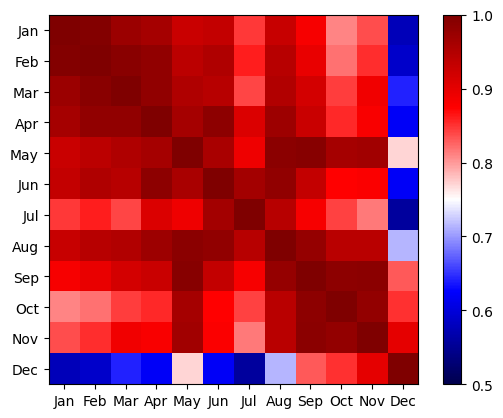

In [151]:
import matplotlib.pyplot as plt
plt.imshow(corr,cmap='seismic',interpolation='none',vmin=0.5,vmax=1)
plt.colorbar()
plt.xticks(range(len(corr)),corr.columns)
plt.yticks(range(len(corr)),corr.columns)

<AxesSubplot: xlabel='Feb', ylabel='Jan'>

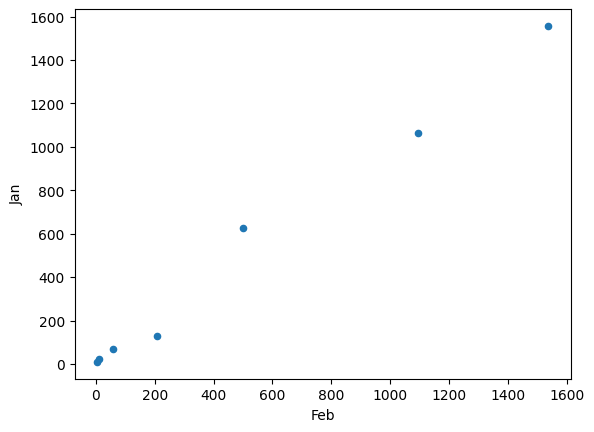

In [152]:
mon_mean.plot(kind='scatter',x='Feb',y='Jan')

<AxesSubplot: xlabel='Mar', ylabel='Dec'>

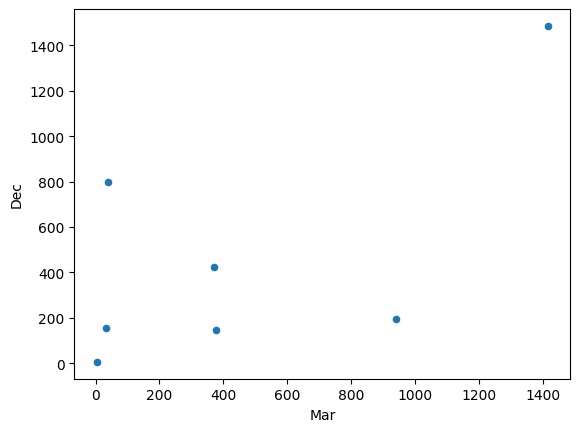

In [153]:
mon_mean.plot(kind='scatter',x='Mar',y='Dec')